In [30]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
sns.set_theme(
    style="whitegrid",
    font="DejaVu Sans",
    palette="pastel",
    rc={"figure.figsize": (12, 6)}
)

In [32]:
# Загрузка данных
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_approved_at','order_purchase_timestamp','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
orders_products = pd.read_csv('olist_products_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
# Объединение данных
olist_base = orders.merge(order_items, on='order_id') \
           .merge(orders_products, on='product_id') \
           .merge(product_category, on='product_category_name')\
           .merge(customers, on='customer_id') \
           .merge(payments, on='order_id')

In [34]:
olist_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   customer_id                    115878 non-null  object        
 2   order_status                   115878 non-null  object        
 3   order_purchase_timestamp       115878 non-null  datetime64[ns]
 4   order_approved_at              115864 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114673 non-null  datetime64[ns]
 6   order_delivered_customer_date  113383 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115878 non-null  datetime64[ns]
 8   order_item_id                  115878 non-null  int64         
 9   product_id                     115878 non-null  object        
 10  seller_id                      115878 non-null  object        
 11  

In [35]:
olist_base.shape

(115878, 31)

In [36]:
olist_df = olist_base.copy()

In [37]:
olist_df['order_date'] = olist_df['order_purchase_timestamp'].dt.date

In [38]:
#Фильтруем данные 
black_weeks_df = olist_df.query("'2017-11-18' <= order_purchase_timestamp <= '2017-11-30' & order_status == 'delivered'")

In [39]:
#Посчитаем количество уникальных заказов с 18 по 30 ноября, т.е за 6 дней до и 6 дней после черной пятницы
order_day_count = black_weeks_df.groupby('order_date')\
                               .agg(daily_order_count=('order_id', 'nunique')).reset_index()

In [40]:
order_day_count

,order_date,daily_order_count
0,2017-11-18,140
1,2017-11-19,152
2,2017-11-20,216
3,2017-11-21,215
4,2017-11-22,185
5,2017-11-23,263
6,2017-11-24,1140
7,2017-11-25,480
8,2017-11-26,376
9,2017-11-27,390


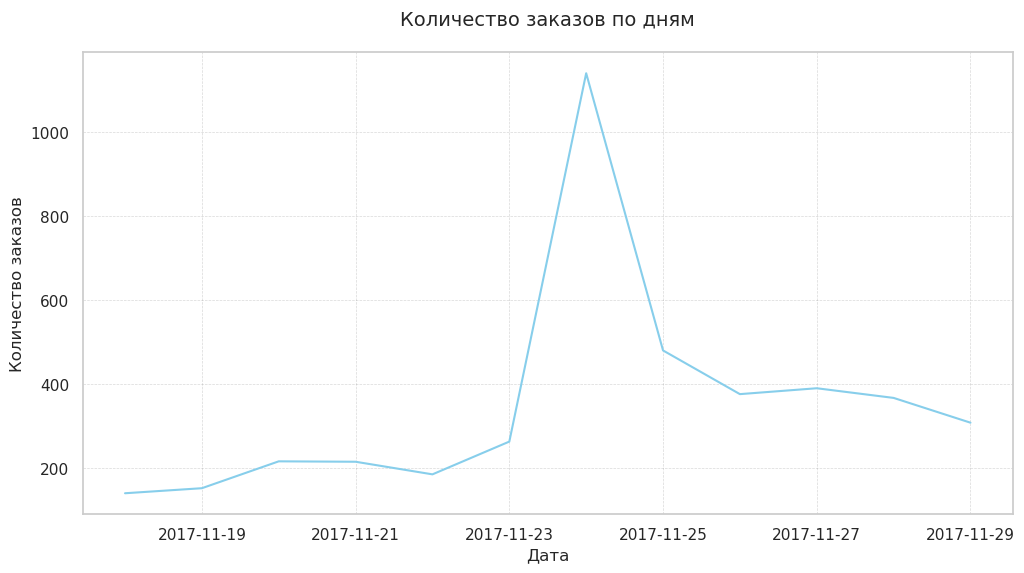

In [41]:
plt.figure(figsize=(12, 6), facecolor='white')  # Белый фон вокруг графика

# Построение линии графика 
plt.plot(order_day_count['order_date'], 
         order_day_count['daily_order_count'], 
         color='skyblue',  
         linewidth=1.5)

# Настройка оформления
plt.title('Количество заказов по дням', fontsize=14, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)

# Настройка сетки (полупрозрачная серая)
plt.grid(True, 
         color='gray', 
         linestyle='--', 
         linewidth=0.5, 
         alpha=0.3)

In [16]:
black_weeks_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_date
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,credit_card,1,72.20,2017-11-18
21,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11,1,cce679660c66e6fbd5c8091dfd29e9cd,...,bed_bath_table,d0ff1a7468fcc46b8fc658ab35d2a12c,13186,hortolandia,SP,1,credit_card,1,29.75,2017-11-21
47,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1,be021417a6acb56b9b50d3fd2714baa8,...,housewares,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,credit_card,10,356.12,2017-11-24
117,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,1,f8a8f05a35976a91aed5cccc3992c357,...,furniture_decor,781ae350edb16842380e81d7c7feb431,20740,rio de janeiro,RJ,1,credit_card,5,101.74,2017-11-22
130,9d531c565e28c3e0d756192f84d8731f,d4faa220408c20e53595d2950f361f3b,delivered,2017-11-28 21:00:44,2017-12-01 09:31:15,2017-12-14 20:37:43,2018-01-23 21:38:52,2017-12-22,1,807b2de93dbb064bbc82dc6ac963bc61,...,furniture_decor,efc37ae565ee0943cca2b89fc65c4d6f,24933,marica,RJ,1,credit_card,4,40.09,2017-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115818,c0524fb1b4c905d054adbddaffa2380c,92e8f9754238b9697d9dcbe02c20fc70,delivered,2017-11-24 16:44:08,2017-11-28 03:39:41,2017-12-01 17:29:06,2017-12-11 18:09:24,2017-12-22,1,738da8ddda2e593acfdc53c2d1520dfa,...,musical_instruments,3f47ce7f07f450a63c6a1a7460074d75,99010,passo fundo,RS,1,boleto,1,97.71,2017-11-24
115824,29b199897e15bd5a4b501cf5eee8b948,530575e87308897d871c2008d28713dc,delivered,2017-11-19 18:00:41,2017-11-19 18:15:32,2017-11-22 19:08:33,2017-11-27 23:11:55,2017-12-12,1,e84997d75938765ef99930f908ceedf4,...,stationery,3b6572635fb53a6846bacb6947a91e93,37410,tres coracoes,MG,1,credit_card,2,145.14,2017-11-19
115836,a2a701c6f01ddffde8a1bde136ed7d4a,8543703cb2bc95c3606af4af727d604f,delivered,2017-11-26 10:26:55,2017-11-26 10:36:06,2017-11-27 22:49:48,2017-12-16 02:54:56,2018-01-03,1,ea4f4b5a820fea007c6c8d7ef9a790bc,...,computers_accessories,21ad443c5dd9c2d257fd514ec411d183,66620,belem,PA,1,credit_card,1,71.36,2017-11-26
115844,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,delivered,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15,1,526f833e1eb0a32ad9351145a761b9ab,...,watches_gifts,7d414b6a1cf56a6bc5035f9eb436b15d,13490,cordeiropolis,SP,1,credit_card,3,141.40,2017-11-26


In [17]:
#Посчитаем выручку за этот же период
daily_revenue = black_weeks_df.groupby('order_date').agg(revenue = ('price','sum')).reset_index()

/tmp/ipykernel_12128/3475537020.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


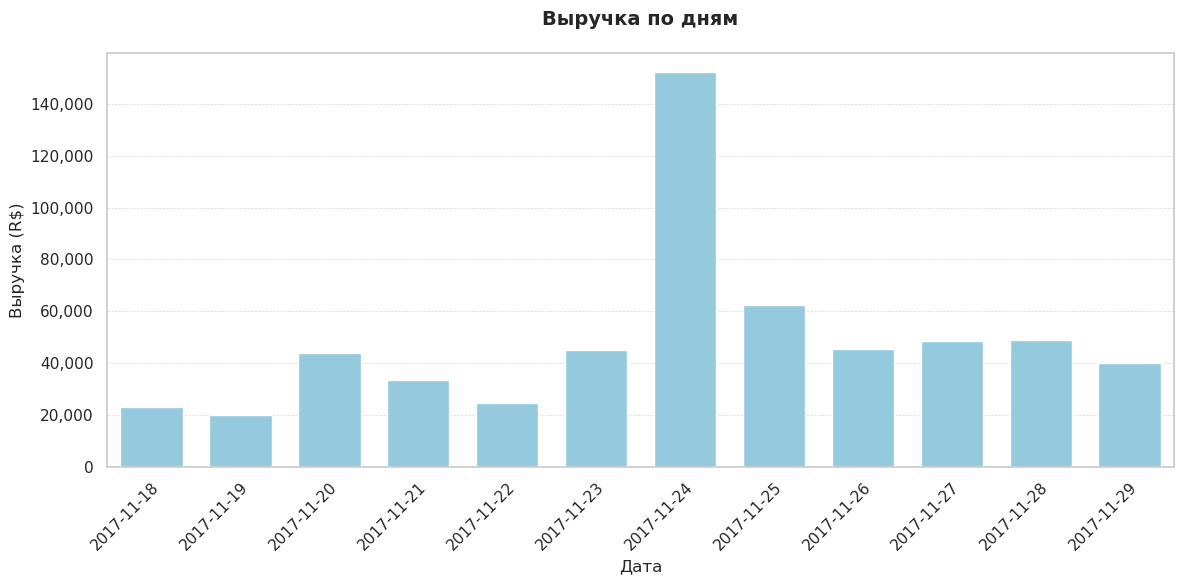

In [44]:
plt.figure(figsize=(12, 6), facecolor='white')

# Настраиваем шрифт (используем DejaVu Sans как безопасную альтернативу Arial)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12






# Строим вертикальный барплот
ax = sns.barplot(
    x='order_date',
    y='revenue',
    data=daily_revenue,
    color='skyblue',
    width=0.7  # Ширина столбцов
)

# Настройка оформления
plt.title('Выручка по дням', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка (R$)', fontsize=12)

# Поворачиваем подписи дат для лучшей читаемости
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor'
)

# Настройка сетки
plt.grid(True, 
         axis='y',  # Только горизонтальные линии
         color='gray', 
         linestyle='--', 
         linewidth=0.5, 
         alpha=0.3)

# Форматирование оси Y (добавляем разделители тысяч)
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
# Автоматическая регулировка отступов
plt.tight_layout()

plt.show()

In [19]:
black_friday = black_weeks_df[black_weeks_df['order_date'].astype(str) == '2017-11-24']

In [20]:
black_friday

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_date
47,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,1,be021417a6acb56b9b50d3fd2714baa8,...,housewares,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,credit_card,10,356.12,2017-11-24
149,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,delivered,2017-11-24 21:55:22,2017-11-25 01:31:43,2017-11-28 22:37:15,2017-12-01 21:11:40,2017-12-15,1,a6ad77b15e566298a4e8ee2011ab1255,...,furniture_decor,8731e1c5aa27eced509f47d8012ff81e,20270,rio de janeiro,RJ,1,credit_card,10,142.16,2017-11-24
150,b01875821b8dcb6abc61776f0f971bce,818596f5b68adfe2c11498ebb6d39e02,delivered,2017-11-24 21:55:22,2017-11-25 01:31:43,2017-11-28 22:37:15,2017-12-01 21:11:40,2017-12-15,2,a6ad77b15e566298a4e8ee2011ab1255,...,furniture_decor,8731e1c5aa27eced509f47d8012ff81e,20270,rio de janeiro,RJ,1,credit_card,10,142.16,2017-11-24
280,c263211bd219538f7c031591e87ef0d7,ed8c52327eecff596e141636d5b556d2,delivered,2017-11-24 16:56:46,2017-11-28 03:48:24,2017-12-08 23:28:26,2017-12-18 20:24:54,2017-12-19,1,028b0b0277744a9eaa2c4f57c24dcb68,...,furniture_decor,b6ebed144895adea96b6193124ea3db4,85501,pato branco,PR,1,boleto,1,753.94,2017-11-24
281,c263211bd219538f7c031591e87ef0d7,ed8c52327eecff596e141636d5b556d2,delivered,2017-11-24 16:56:46,2017-11-28 03:48:24,2017-12-08 23:28:26,2017-12-18 20:24:54,2017-12-19,2,028b0b0277744a9eaa2c4f57c24dcb68,...,furniture_decor,b6ebed144895adea96b6193124ea3db4,85501,pato branco,PR,1,boleto,1,753.94,2017-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115512,b93b079468bdf6a20fd54cf45d1e03b6,e570debfd69192cdd2e846ae00869a33,delivered,2017-11-24 22:29:08,2017-11-25 01:31:36,2017-11-28 21:54:48,2017-12-11 21:11:35,2017-12-20,1,75d6b6963340c6063f7f4cfcccfe6a30,...,perfumery,11cd4821f3f646fae625b1f043fb5ec3,28860,casimiro de abreu,RJ,1,credit_card,4,42.95,2017-11-24
115564,efe279abeb0fb2d03273c495d19b9f29,a0973c8c7e186a3e7425bb1ae01b0c9c,delivered,2017-11-24 08:31:27,2017-11-24 08:56:30,2017-11-24 21:41:16,2017-12-06 03:13:29,2017-12-21,1,1e1a186a03f0d98268516827690d4fd2,...,baby,1c1ca0f24271081b1116978a1167ace3,45600,itabuna,BA,1,credit_card,5,78.87,2017-11-24
115726,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,delivered,2017-11-24 20:59:45,2017-11-25 00:37:55,2017-11-27 17:34:30,2017-12-05 19:07:39,2017-12-15,1,ea555c5a04b369a1505d5fca42617d7e,...,computers_accessories,f4c0ed4f813223763b5cc0c629bf452c,31990,belo horizonte,MG,1,credit_card,4,106.20,2017-11-24
115727,d81e1aea4814c6e5744458bcd1f94693,70d1caf284f34ea4ee405e25edba63f5,delivered,2017-11-24 20:59:45,2017-11-25 00:37:55,2017-11-27 17:34:30,2017-12-05 19:07:39,2017-12-15,2,ea555c5a04b369a1505d5fca42617d7e,...,computers_accessories,f4c0ed4f813223763b5cc0c629bf452c,31990,belo horizonte,MG,1,credit_card,4,106.20,2017-11-24


In [21]:
black_friday.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,1374,1374,1374,1374,1374,1374.000000,1374,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,2017-11-24 14:46:27.631004416,2017-11-25 02:34:23.078602496,2017-11-29 20:32:43.098981120,2017-12-11 14:48:40.307132416,2017-12-17 17:00:47.161572096,1.209607,2017-12-01 15:45:58.010189312,110.754709,18.669956,49.516739,686.532023,2.150655,1856.053857,30.390102,16.001456,23.673945,35657.282387,1.050946,3.667394,182.712948
min,2017-11-24 00:01:45,2017-11-24 00:37:40,2017-11-24 14:12:38,2017-11-25 13:23:00,2017-12-08 00:00:00,1.000000,2017-11-29 22:11:39,6.000000,0.140000,9.000000,30.000000,1.000000,50.000000,8.000000,2.000000,6.000000,1221.000000,1.000000,1.000000,0.080000
25%,2017-11-24 10:46:03.750000128,2017-11-24 14:52:32.500000,2017-11-27 19:42:55,2017-12-04 19:58:53,2017-12-14 00:00:00,1.000000,2017-11-30 02:53:16.750000128,38.062500,13.370000,43.000000,324.000000,1.000000,300.000000,19.000000,8.000000,15.000000,12233.000000,1.000000,1.000000,61.755000
50%,2017-11-24 15:10:03,2017-11-24 21:16:40,2017-11-28 19:32:10,2017-12-08 15:09:47,2017-12-18 00:00:00,1.000000,2017-11-30 14:53:45,64.945000,16.110000,53.000000,534.500000,2.000000,800.000000,26.000000,14.000000,20.000000,26147.500000,1.000000,2.000000,106.245000
75%,2017-11-24 20:15:56,2017-11-25 02:14:18.750000128,2017-11-29 23:16:26.249999872,2017-12-15 19:05:41.750000128,2017-12-21 00:00:00,1.000000,2017-12-01 09:50:40,119.900000,18.265000,57.000000,867.000000,3.000000,1650.000000,37.000000,22.000000,30.000000,57049.000000,1.000000,5.750000,186.190000
max,2017-11-24 23:59:48,2017-12-07 09:50:08,2018-01-04 23:29:18,2018-02-16 17:58:57,2018-01-12 00:00:00,6.000000,2017-12-18 03:33:49,2400.000000,132.940000,64.000000,3734.000000,9.000000,30000.000000,105.000000,105.000000,92.000000,99700.000000,9.000000,15.000000,6081.540000
std,NaN,NaN,NaN,NaN,NaN,0.597173,NaN,156.390214,11.662883,9.588744,554.245402,1.554500,3328.550264,16.132439,11.767101,11.448161,29650.416159,0.414973,3.183511,430.207778


In [22]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 47 to 115818
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1374 non-null   object        
 1   customer_id                    1374 non-null   object        
 2   order_status                   1374 non-null   object        
 3   order_purchase_timestamp       1374 non-null   datetime64[ns]
 4   order_approved_at              1374 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1374 non-null   datetime64[ns]
 6   order_delivered_customer_date  1374 non-null   datetime64[ns]
 7   order_estimated_delivery_date  1374 non-null   datetime64[ns]
 8   order_item_id                  1374 non-null   int64         
 9   product_id                     1374 non-null   object        
 10  seller_id                      1374 non-null   object        
 11  shipping_limit_date

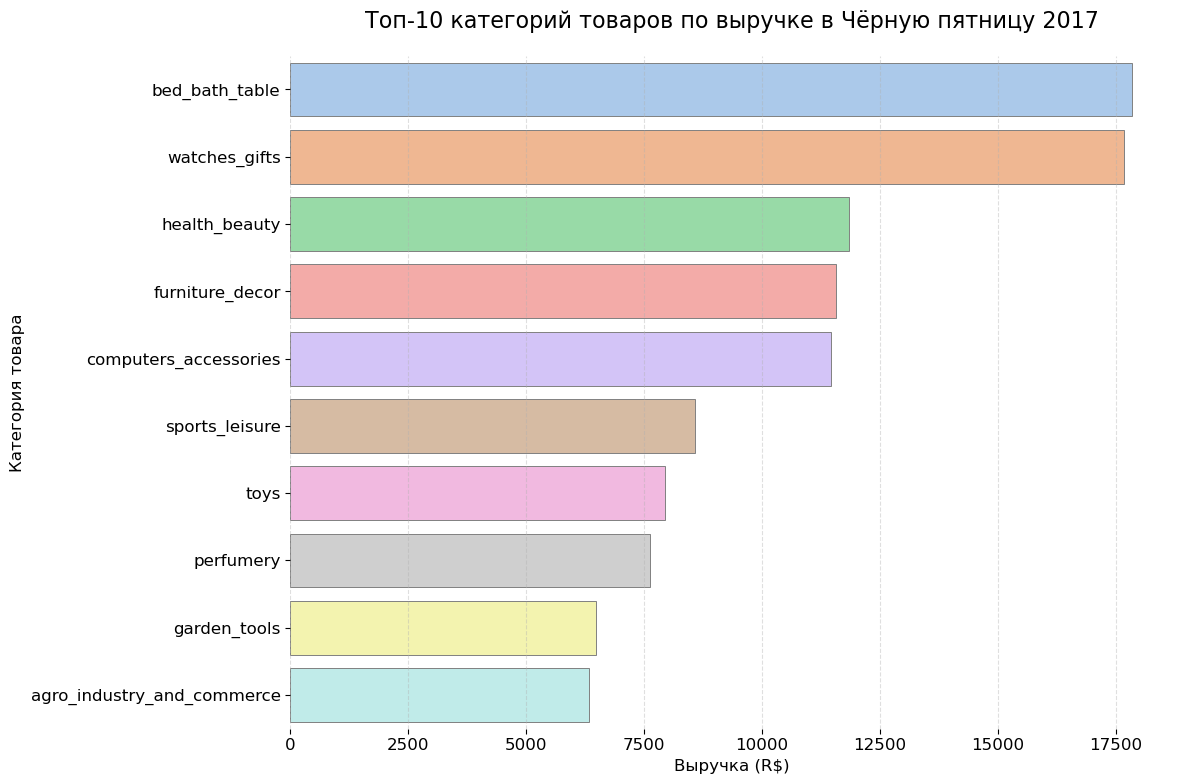

In [23]:
#Топ категорий товаров
# Группируем по категориям
top_categories = black_friday.groupby('product_category_name_english')['price'].sum().nlargest(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    hue=top_categories.index,  # <- явно указываем hue
    palette="pastel",          # светлая палитра
    edgecolor='gray',
    linewidth=0.7,
    legend=False,             # отключаем легенду (иначе будет дублирование)
    dodge=False               # избегаем "разъезжания" столбцов
)


plt.title("Топ-10 категорий товаров по выручке в Чёрную пятницу 2017", fontsize=16, pad=20)
plt.xlabel("Выручка (R$)", fontsize=12)
plt.ylabel("Категория товара", fontsize=12)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/tmp/ipykernel_12128/3855804166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  black_friday['hour'] = black_friday['order_purchase_timestamp'].dt.hour


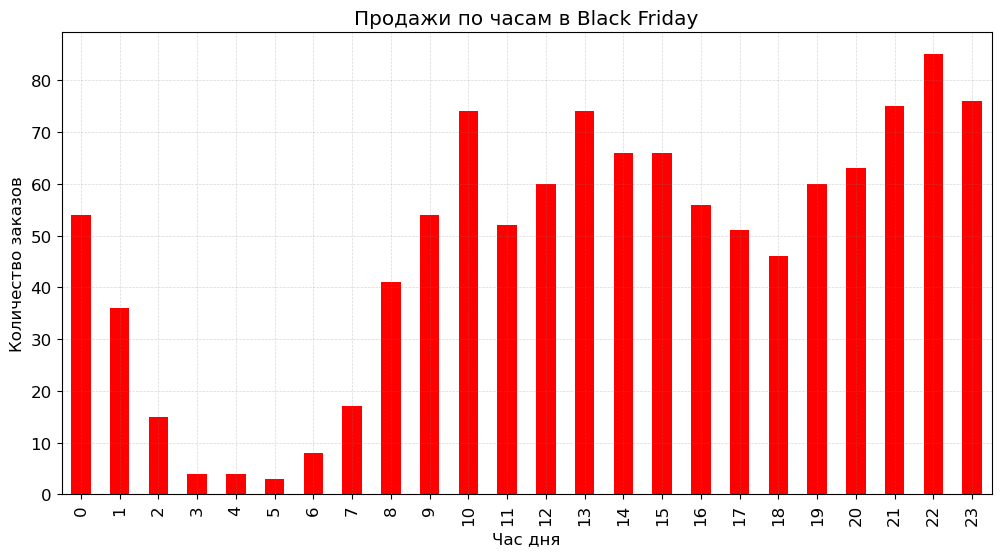

In [24]:
black_friday['hour'] = black_friday['order_purchase_timestamp'].dt.hour
hourly_sales_bf = black_friday.groupby('hour')['order_id'].nunique()

plt.figure(figsize=(12, 6))
hourly_sales_bf.plot(kind='bar', color='red')
plt.title("Продажи по часам в Black Friday")
plt.xlabel("Час дня")
plt.ylabel("Количество заказов")
plt.grid(True, 
         color='gray', 
         linestyle='--', 
         linewidth=0.5, 
         alpha=0.3)
plt.show()

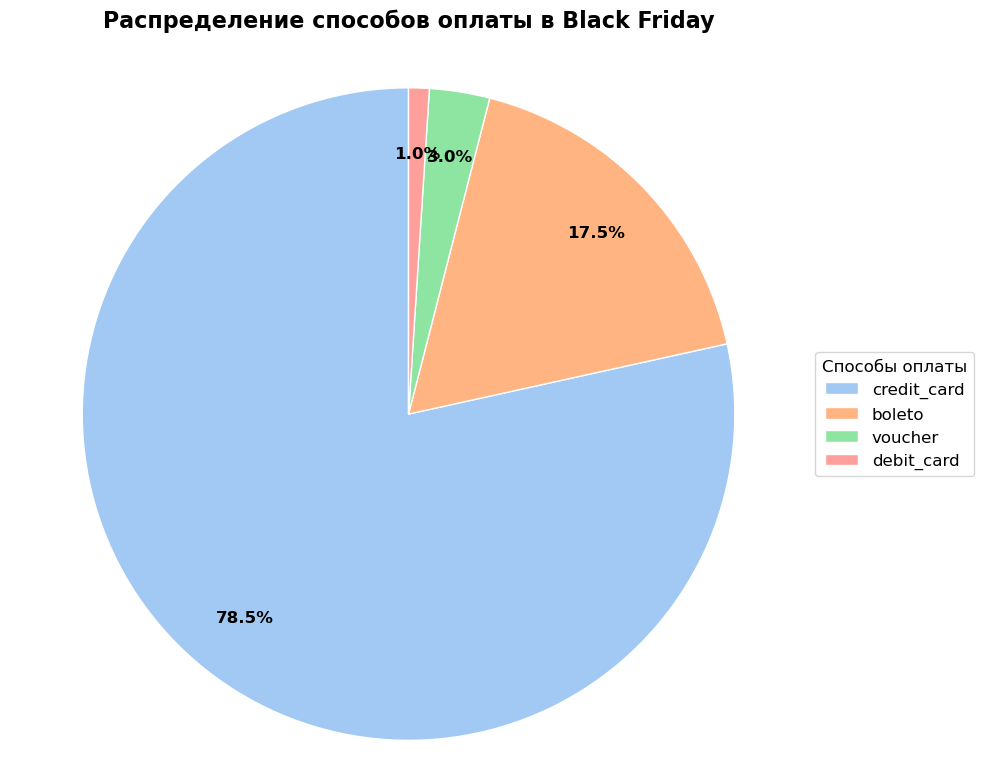

In [25]:
payment_methods = black_friday['payment_type'].value_counts(normalize=True) * 100
# Настройка стиля
colors = sns.color_palette('pastel')[:len(payment_methods)]  # пастельные цвета

# Создание диаграммы
fig, ax = plt.subplots(figsize=(10, 8))

# Круговая диаграмма без подписей на секторах
wedges, texts, autotexts = ax.pie(
    payment_methods,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    labeldistance=None  # убираем подписи из секторов
)

# Добавляем легенду вместо подписей
ax.legend(
    wedges,
    payment_methods.index,
    title="Способы оплаты",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # выносим справа
    fontsize=12
)


# Настройка заголовка
plt.title(
    "Распределение способов оплаты в Black Friday",
    fontsize=16,
    pad=20,
    fontweight='bold'
)

# Делаем диаграмму круглой
ax.axis('equal')

plt.tight_layout()
plt.show()

In [26]:
#Выручка и количество заказов

# Группировка по часам
hourly_stats = black_friday.groupby(black_friday['order_purchase_timestamp'].dt.hour).agg(
    orders_count=('order_id', 'nunique'),
    revenue=('price', 'sum'),
    avg_order_value=('price', 'mean'),
    items_per_order=('order_id', 'count')
).reset_index()

hourly_stats = hourly_stats.rename(columns={'order_purchase_timestamp' : 'hour'})


In [27]:
# Считаем товары в заказе
order_items_count = black_friday.groupby('order_id').agg(
    item_count=('product_id', 'count'),
    order_value=('price', 'sum')
).reset_index()

In [28]:
hourly_stats

,hour,orders_count,revenue,avg_order_value,items_per_order
0,0,54,7455.56,120.250968,62
1,1,36,7129.64,187.622105,38
2,2,15,1311.38,69.020000,19
3,3,4,272.50,68.125000,4
4,4,4,370.89,92.722500,4
5,5,3,204.78,68.260000,3
6,6,8,2474.48,309.310000,8
7,7,17,1844.34,102.463333,18
8,8,41,4884.24,95.769412,51
9,9,54,5382.40,92.800000,58


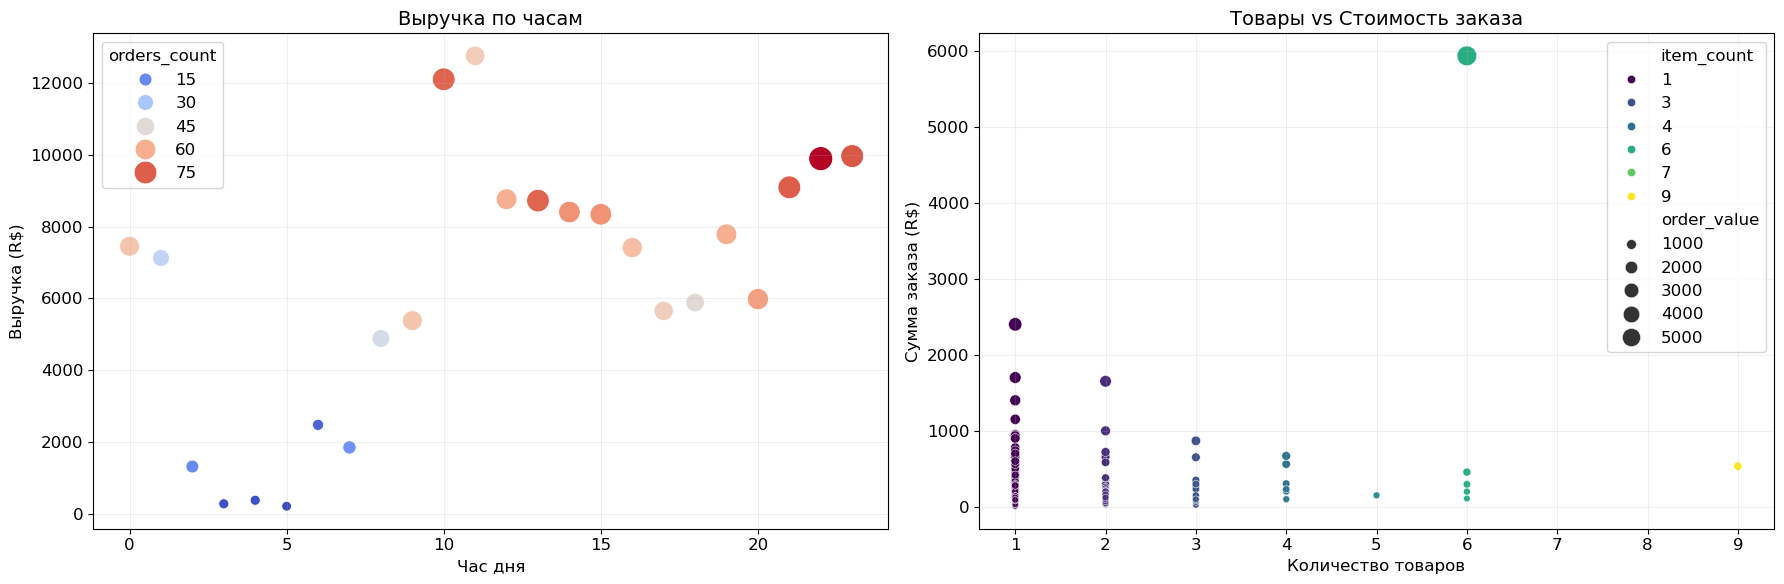

In [29]:
# Создаем фигуру с 2 субплoтами (1 строка, 2 столбца)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='white')

# --- График 1: Выручка vs Часы ---
sns.scatterplot(
    data=hourly_stats,
    x='hour',
    y='revenue',
    size='orders_count',
    hue='orders_count',
    palette='coolwarm',
    sizes=(50, 300),
    ax=ax1
)
ax1.set_title('Выручка по часам', fontsize=14)
ax1.set_xlabel('Час дня', fontsize=12)
ax1.set_ylabel('Выручка (R$)', fontsize=12)
ax1.grid(alpha=0.2)

# --- График 2: Средний чек vs Товары ---
sns.scatterplot(
    data=order_items_count,
    x='item_count',
    y='order_value',
    hue='item_count',
    palette='viridis',
    size='order_value',
    sizes=(20, 200),
    ax=ax2
)
ax2.set_title('Товары vs Стоимость заказа', fontsize=14)
ax2.set_xlabel('Количество товаров', fontsize=12)
ax2.set_ylabel('Сумма заказа (R$)', fontsize=12)
ax2.grid(alpha=0.2)

plt.tight_layout()
plt.show()